# Getting started with PUDL
This notebook is meant to help you start working with [the data that's loaded into the PUDL database](https://github.com/catalyst-cooperative/pudl#available-data).
If you haven't gotten the database up and running yet, you should work your way through [our getting started guide on GitHub](https://github.com/catalyst-cooperative/pudl/blob/master/docs/getting_started.md) first, and then come back here. We'll assume that you're at least somewhat familiar with the Python programming language and Jupyter Notebooks.

If you're not yet familiar with Jupyter Notebooks, here are a few resources:
 * [A Jupyter Notebook tutorial from DataCamp](https://www.datacamp.com/community/tutorials/tutorial-jupyter-notebook)
 * [An introduction to Jupyter Notebooks from Real Python](https://realpython.com/jupyter-notebook-introduction/)
 * [A gallery of interesting Notebooks from Project Jupyter](https://github.com/jupyter/jupyter/wiki/A-gallery-of-interesting-Jupyter-Notebooks)

In [1]:
# Pandas for data analysis:
import pandas as pd

# SQLAlchemy gives us a bunch of database tools:
import sqlalchemy as sa

# Import the top level PUDL package:
import pudl

# Connecting to our databases.
Currently PUDL creates two distinct databases. The FERC Form 1 Database is
a compilation of all the raw Form 1 data that has been released by FERC
since 1994. We use an SQLite database to store this cloned data in the file
`results/sqlite/ferc1.sqlite` within the PUDL repository. If you really
need access to the original FERC Form 1 data, you can create a connection
to the database directly like this:

In [2]:
pudl_settings = pudl.workspace.setup.get_defaults()
pudl_settings

{'pudl_in': '/home/zane/code/catalyst/pudl-work',
 'data_dir': '/home/zane/code/catalyst/pudl-work/data',
 'settings_dir': '/home/zane/code/catalyst/pudl-work/settings',
 'pudl_out': '/home/zane/code/catalyst/pudl-work',
 'sqlite_dir': '/home/zane/code/catalyst/pudl-work/sqlite',
 'parquet_dir': '/home/zane/code/catalyst/pudl-work/parquet',
 'datapackage_dir': '/home/zane/code/catalyst/pudl-work/datapackage',
 'notebook_dir': '/home/zane/code/catalyst/pudl-work/notebook',
 'ferc1_db': 'sqlite:////home/zane/code/catalyst/pudl-work/sqlite/ferc1.sqlite',
 'pudl_db': 'sqlite:////home/zane/code/catalyst/pudl-work/sqlite/pudl.sqlite'}

In [3]:
ferc1_engine = sa.create_engine(pudl_settings["ferc1_db"])

Then you can use Pandas to pull a particular FERC Form 1 table, or run an arbitrary SQL query on the database, using `pd.read_sql()`  For instance, this will create a dataframe called `f1_fuel_df` containing all of the origingal FERC Form 1 data from the `f1_fuel` table, which contains information about the fuel consumed by large thermal generators, from 1994 to the present.

In [4]:
f1_fuel_df = pd.read_sql_table('f1_fuel', ferc1_engine)

If you want to see a 10-line long random sample of what's in that dataframe..., the `df.sample()` function is here for you:

In [5]:
f1_fuel_df.sample(10)

,respondent_id,report_year,spplmnt_num,row_number,row_seq,row_prvlg,plant_name,fuel,fuel_unit,fuel_quantity,...,fuel_f,fuel_unit_f,fuel_quantity_f,fuel_avg_heat_f,fuel_cost_delvd_f,fuel_cost_burned_f,fuel_cost_btu_f,fuel_cost_kwh_f,fuel_generaton_f,report_prd
111585,51,2013,1,1,1,,State Line,Gas,MCF,31427.0,...,0,0,0,0,0,0,0,0,0,12
64824,186,2005,2,15,15,,Possum Point,Natural Gas,mcf,1646275.0,...,0,0,0,0,0,0,0,0,0,12
121530,288,2015,0,1,1,,Valencia,Gas,MCF,6487.0,...,0,0,0,0,0,0,0,0,0,12
43237,141,2001,0,13,13,N,Coyote Springs,Gas,Mcf's,14450963.0,...,0,0,0,0,0,0,0,0,0,12
42252,151,2001,0,3,3,N,Rochester Station 3,,,NaN,...,0,0,0,0,0,0,0,0,0,12
54842,159,2003,4,8,8,N,Coit #2 Peaking Unit,,,NaN,...,0,0,0,0,0,0,0,0,0,12
57121,280,2003,0,7,7,N,,,,NaN,...,0,0,0,0,0,0,0,0,0,12
10046,130,1996,0,9,0,N,SEMINOLE,OIL,BBLS,122807.0,...,0,0,0,0,0,0,0,0,0,12
34443,156,2000,1,10,10,N,McIntosh,Gas,MCF,1145716.0,...,0,0,0,0,0,0,0,0,0,12
47989,73,2002,0,10,10,N,Rockport Total Plant,COAL,TONS,9223602.0,...,0,0,0,0,0,0,0,0,0,12


However, there are a bunch of "footnote" reference columns that end with `_f` which aren't particularly useful here. To drop them from the dataframe and look at a different sample of the remaining dataframe we can do:

In [6]:
f1_fuel_df = f1_fuel_df.drop(f1_fuel_df.filter(like='_f').columns, axis=1)
f1_fuel_df.sample(10)

,respondent_id,report_year,spplmnt_num,row_number,row_seq,row_prvlg,plant_name,fuel,fuel_unit,fuel_quantity,fuel_avg_heat,fuel_cost_delvd,fuel_cost_burned,fuel_cost_btu,fuel_cost_kwh,fuel_generaton,report_prd
83541,36,2008,0,7,7,,Hudson Ave.,,,NaN,NaN,0.000,0.000,0.000,0.000,0.000,12
10259,86,1996,0,8,0,N,N/A,,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12
23154,94,1998,0,1,1,,Kahului,,,NaN,NaN,0.000,0.000,0.000,0.000,0.000,12
106494,87,2012,0,10,10,,Ninemile Point,,,NaN,NaN,0.000,0.000,0.000,0.000,0.000,12
108443,170,2012,0,9,9,,Bayside Units 1 & 2,Natural Gas,Gas-MCF,50662368.0,1014135.0,5.424,5.432,5.357,3.908,7.296,12
26556,177,1999,3,13,13,N,,,,NaN,NaN,0.000,0.000,0.000,0.000,0.000,12
66918,288,2005,0,9,9,,,,,NaN,NaN,0.000,0.000,0.000,0.000,0.000,12
53684,133,2003,4,5,5,N,,,,NaN,NaN,0.000,0.000,0.000,0.000,0.000,12
103636,148,2012,1,2,2,,SOUTHWESTERN 1 - 3,,,NaN,NaN,0.000,0.000,0.000,0.000,0.000,12
10881,39,1996,1,13,0,N,MIDDLETOWN,#6 Oil,Bbl,2523888.0,150877.0,21.515,20.953,3.306,0.037,11453.000,12


### FERC Form 1, but from PUDL
But that's just the FERC Form 1 DB... and it's a mess.  To connect to the PUDL database, which includes a cleaned up subset of the FERC Form 1 data, as well as data from the EIA 860 and EIA 923, we can do something similar, to access the same data, but in an easier to use form. Note that the fuel types have been standardized, several derived columns are now gone, and the column names are more informative.

In [7]:
pudl_engine = sa.create_engine(pudl_settings["pudl_db"])
# Dropping the 'id' column which contains autoincremented surrogate primary key
fuel_ferc1_df = pd.read_sql('fuel_ferc1', pudl_engine).drop('id', axis=1)
fuel_ferc1_df.sample(10)

,record_id,utility_id_ferc1,report_year,plant_name,fuel_type_code_pudl,fuel_unit,fuel_qty_burned,fuel_mmbtu_per_unit,fuel_cost_per_unit_burned,fuel_cost_per_unit_delivered,fuel_cost_per_mmbtu
3968,f1_fuel_2007_41_0_10,41,2007,karn 1 & 2,coal,ton,1823065.0,19.949832,45.345,45.544,2.27300
12728,f1_fuel_2014_63_0_13,63,2014,willow glen,gas,mcf,11396517.0,1.023200,4.384,0.000,4.28400
3664,f1_fuel_2006_159_0_15,159,2006,canadys,oil,bbl,24872.0,5.853666,81.527,82.070,13.92700
7324,f1_fuel_2009_134_2_11,134,2009,wyodak,oil,bbl,6243.0,5.880000,98.704,98.704,16.78700
10514,f1_fuel_2012_17_3_5,17,2012,smith energy complex,gas,mcf,71097189.0,1.014000,4.855,0.000,4.79000
15412,f1_fuel_2016_44_0_2,44,2016,belle river (total),oil,bbl,29497.0,5.811960,54.757,54.602,9.42100
634,f1_fuel_2004_171_0_4,171,2004,unit 4,coal,ton,560168.0,11.000000,33.157,33.316,1.51500
720,f1_fuel_2004_193_2_7,193,2004,paris-total,gas,mcf,378450.0,1.010000,5.454,5.454,5.40021
12240,f1_fuel_2013_7_0_7,7,2013,cholla 2,coal,ton,945035.0,18.660000,38.651,37.886,2.07100
10988,f1_fuel_2012_57_3_9,57,2012,mitchell no. 4,oil,bbl,643.0,5.817000,106.344,106.344,18.28700


### Selecting data with an SQL query
Of course, we can also pull other data. Here we'll data from the EIA 923 Fuel Receipts and Costs table into a dataframe, using an SQL query rather than pulling the table directly. Let's limit it to coal records from January 2014 or later.

In [8]:
frc_eia923 = pd.read_sql(
    """SELECT * FROM fuel_receipts_costs_eia923
       WHERE fuel_type_code_pudl='coal'""", pudl_engine)
frc_eia923.sample(10)

,id,plant_id_eia,report_date,contract_type_code,contract_expiration_date,energy_source_code,fuel_type_code_pudl,fuel_group_code,fuel_group_code_simple,mine_id_pudl,...,sulfur_content_pct,ash_content_pct,mercury_content_ppm,fuel_cost_per_mmbtu,primary_transportation_mode_code,secondary_transportation_mode_code,natural_gas_transport_code,natural_gas_delivery_contract_type_code,moisture_content_pct,chlorine_content_ppm
53809,138615,602,2011-05-01,C,2011-12-01,BIT,coal,coal,coal,601.0,...,0.80,12.5,NaN,NaN,RR,TP,None,None,NaN,NaN
13388,32297,3297,2009-07-01,S,None,BIT,coal,coal,coal,70.0,...,0.90,7.5,NaN,5.700,RR,None,None,None,NaN,NaN
123167,297598,994,2015-03-01,C,2015-12-01,BIT,coal,coal,coal,1677.0,...,3.24,8.7,0.00,2.358,RR,None,None,None,NaN,NaN
62034,160608,6016,2011-09-01,C,2012-12-01,SUB,coal,coal,coal,26.0,...,0.20,4.5,NaN,1.876,RR,None,None,None,NaN,NaN
136507,328988,3297,2016-02-01,C,2017-12-01,BIT,coal,coal,coal,1552.0,...,1.29,8.1,0.09,3.584,RR,None,None,None,6.54,0.0
39900,101608,3161,2010-09-01,S,None,BIT,coal,coal,coal,51.0,...,1.73,7.1,NaN,NaN,RR,RR,None,None,NaN,NaN
129065,310935,50410,2015-07-01,C,2016-06-01,WC,coal,coal,coal,1208.0,...,0.41,39.5,0.30,NaN,TR,None,None,None,NaN,NaN
40444,102497,6249,2010-09-01,C,None,BIT,coal,coal,coal,917.0,...,1.58,8.1,NaN,4.356,RR,None,None,None,NaN,NaN
87124,221019,2079,2013-02-01,C,2013-12-01,SUB,coal,coal,coal,27.0,...,0.34,5.5,NaN,1.821,RR,None,None,None,NaN,NaN
67722,176315,7790,2011-12-01,C,None,BIT,coal,coal,coal,570.0,...,0.59,13.4,NaN,2.379,RR,None,None,None,NaN,NaN


### Using a tabular output object
The normalized database tables are great, but we've also created some routines to compile dataframes that are a little more human friendly. For instance, by including the names of the various plants and utilities referenced, rather than just their unique IDs. These routines are bundled together into tabular output objects, defined by the `pudl.output.pudltabl.PudlTabl` class. These objects can also aggregate the data appropriately at different time resolutions. This example creates an output object with all available data, at monthly resolution:

In [9]:
pudl_out = pudl.output.pudltabl.PudlTabl(pudl_engine=pudl_engine, freq='MS')

Now that we have the object, we can ask it for some data, say about per-generator net generation:

In [10]:
gen_eia923 = pudl_out.gen_eia923()

In [11]:
gen_eia923.sample(10)

,report_date,plant_id_eia,plant_id_pudl,plant_name,utility_id_eia,utility_id_pudl,utility_name,generator_id,net_generation_mwh
131066,2011-03-01,7652,1271,US DOE Savannah River Site (D Area),56190,4221,Savannah River Nuclear Solutions LLC,LP-3,0.0
61527,2015-04-01,2076,23,Asbury,5860,318,Empire District Electric Co,1,78472.0
55607,2014-12-01,1831,1891,Eckert Station,56155,2253,Lansing Board of Water and Light,6,5442.0
68807,2014-12-01,2393,2085,Gilbert,17235,2691,NRG REMA LLC,8,-484.0
142923,2014-04-01,10099,3119,Pedricktown Cogeneration Company LP,50160,2819,Pedricktown Cogeneration Company LP,GEN1,0.0
118711,2014-08-01,6112,192,Fort St Vrain,15466,272,Public Service Co of Colorado,4,72358.0
100521,2014-10-01,3628,2392,R W Miller,2172,692,Brazos Electric Power Coop Inc,1,0.0
9529,2013-02-01,315,1392,AES Alamitos LLC,22148,406,AES Alamitos LLC,2,2091.0
278944,2011-05-01,57564,5850,Algonquin Power Sanger LLC,56905,443,Algonquin Power Sanger LLC,STG,0.0
31038,2013-07-01,972,1655,Winnetka,20824,3685,Village of Winnetka - (IL),6,0.0


### Requesting derived values from output objects
The output objects also know how to use the available data to calculate some interesting things, on a whole-dataset basis. For example, the per-generator marginal fuel costs, heat rates, and capacity factors... This can take a couple of minutes.

In [12]:
mcoe_df = pudl_out.mcoe()

/home/zane/miniconda3/envs/pudl-dev/lib/python3.7/site-packages/pandas/core/frame.py:7123: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort,


### Plotting from the dataframe
Now that we've got some interesting analysis stored in a dataframe, we should make a few visualizations so we can see what's going on.

In [13]:
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline

In [14]:
plt.style.use('ggplot')
mpl.rcParams['figure.figsize'] = (10,4)
mpl.rcParams['figure.dpi'] = 150

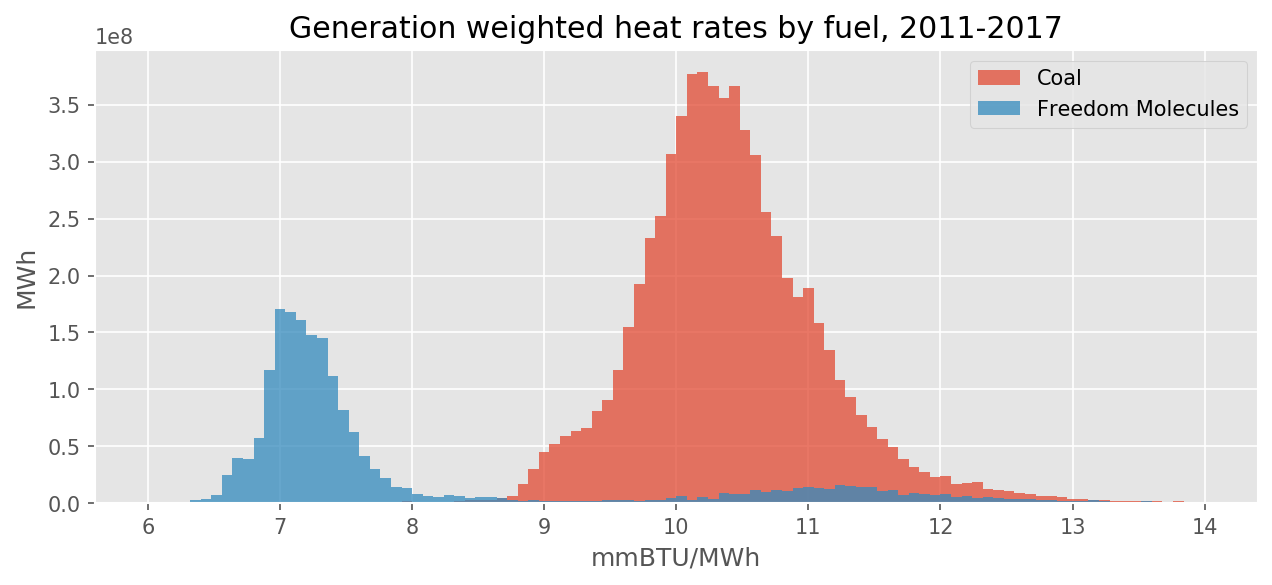

In [15]:
coal_mcoe = mcoe_df[mcoe_df.fuel_type_code_pudl=='coal']
gas_mcoe = mcoe_df[mcoe_df.fuel_type_code_pudl=='gas']
start_year = min(mcoe_df.report_date.dt.year)
end_year = max(mcoe_df.report_date.dt.year)
plt.hist(coal_mcoe.heat_rate_mmbtu_mwh,
         weights=coal_mcoe.net_generation_mwh,
         range=(6,14), bins=100,
         label='Coal', alpha=0.75)
plt.hist(gas_mcoe.heat_rate_mmbtu_mwh,
         weights=gas_mcoe.net_generation_mwh,
         range=(6,14), bins=100,
         label='Freedom Molecules', alpha=0.75)
plt.xlabel('mmBTU/MWh')
plt.ylabel('MWh')
plt.title(f"Generation weighted heat rates by fuel, {start_year}-{end_year}")
plt.legend();

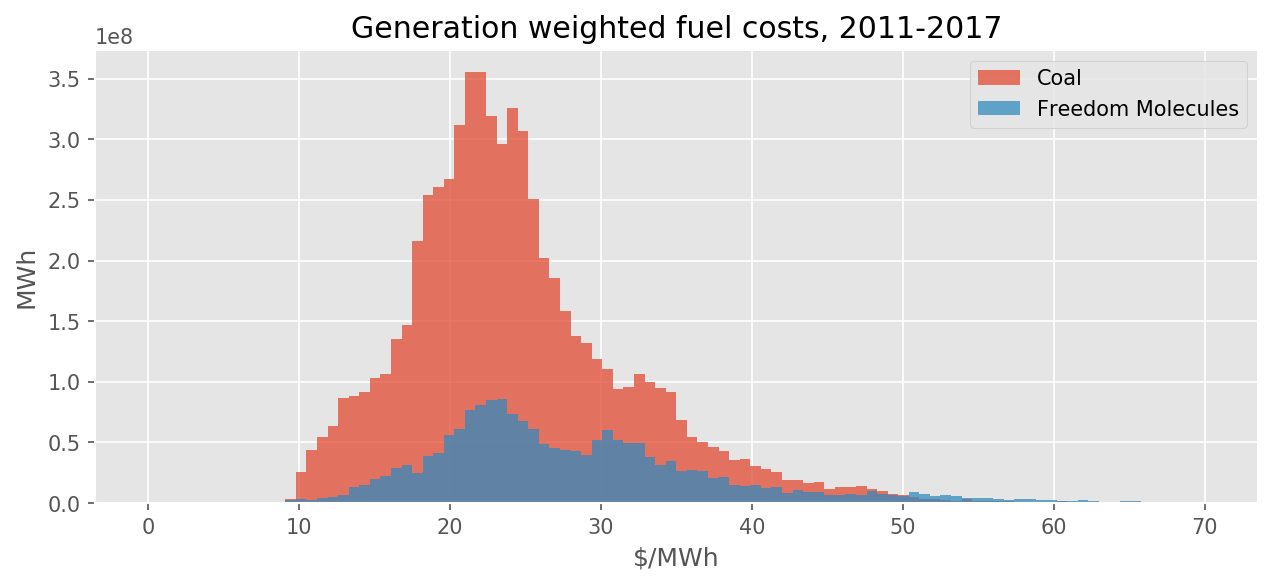

In [16]:
coal_mcoe = mcoe_df[mcoe_df.fuel_type_code_pudl=='coal']
gas_mcoe = mcoe_df[mcoe_df.fuel_type_code_pudl=='gas']
start_year = min(mcoe_df.report_date.dt.year)
end_year = max(mcoe_df.report_date.dt.year)
plt.hist(coal_mcoe.fuel_cost_per_mwh,
         weights=coal_mcoe.net_generation_mwh,
         range=(0,70), bins=100,
         label='Coal', alpha=0.75)
plt.hist(gas_mcoe.fuel_cost_per_mwh,
         weights=gas_mcoe.net_generation_mwh,
         range=(0,70), bins=100,
         label='Freedom Molecules', alpha=0.75)
plt.xlabel('$/MWh')
plt.ylabel('MWh')
plt.title(f"Generation weighted fuel costs, {start_year}-{end_year}")
plt.legend();

## Other notebooks to play with:
Any Jupyter Notebook that's deployed into the `notebook` directory in your PUDL workspace should work, because they are tested automatically by PyTest before we do a release.